In [1]:
# 이미지 인식의 꽃, CNN 익히기

# https://thebook.io/080228/part05/ch16/

In [2]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import utils
#import pandas as pd
#import numpy as np
#import tensorflow as tf
#import sys

In [3]:
# 
# MNIST 데이터는 케라스를 이용해 간단히 불러올 수 있습니다. 
# mnist.load_data() 함수로 사용할 데이터를 불러옵니다.
# 
from keras.datasets import mnist
from keras.utils import np_utils
 
import numpy
import sys
import tensorflow as tf

In [4]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [5]:
# • 학습에 사용될 부분: X_train, Y_class_train
# • 테스트에 사용될 부분: X_test, Y_class_test

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [6]:
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


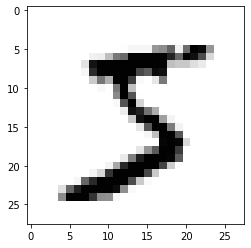

In [7]:
# 불러온 이미지 중 한 개만 다시 불러와 보겠습니다. 
# 이를 위해 먼저 matplotlib 라이브러리를 불러옵니다. 
# 그리고 imshow() 함수를 이용해 이미지를 출력할 수 있습니다. 
# 모든 이미지가 X_train에 저장되어 있으므로 X_train[0]을 통해 
#첫 번째 이미지를, cmap = 'Greys' 옵션을 지정해 흑백으로 출력되게 합니다.

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
print(X_train[0].shape[0])

28


In [9]:
print(X_train[0].shape[1])

28


In [10]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        # sys.stdout.write('%d\t' % i)
        sys.stdout.write('%3d ' % i)  # 1칸만 띄고 3자리로 표시로 바꿈
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [11]:
# 차원 변환 과정
# X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.reshape(X_train.shape[0], -1)  # 784랑 -1이랑 같은 뜻

#X_train = X_train.astype('float64')
X_train = X_train.astype(float)  # tensorflow내부에서 쓰려면 float으로 바꿔야함
# float으로 바꾸면 모든 값이 0~255.0으로 바뀜

X_train = X_train / 255 # 이럼 모든 데이터 값이 0~1 사이로 스케일링 됨

In [12]:
# 확인
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
# test 데이터도 똑같은 과정을 거침
# 위에걸 한방에 쓸 수 있음
#X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [14]:
print(Y_class_train[0])

5


In [15]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


In [16]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)  # 10개의 카테고리로 분류
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [17]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [21]:
#from tensorflow.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
model = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath='modelpath', monitor='val_loss',
                               verbose=1, save_best_only=True)

early_stoping = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
# 모델의 실행
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping, checkpointer])

# 에러나서 안됨.
# 아래 파일(제목에서 날짜제거, 수업내용 코드)로 실행할것

AttributeError: 'str' object has no attribute 'fit'

In [ ]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]

In [ ]:
import matplotlib.pyplot as plt

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show